In [1]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
tf.__version__

'2.17.0'

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance_dummies = pd.get_dummies(insurance, dtype=float)
insurance_dummies

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
from sklearn.model_selection import train_test_split

X = insurance_dummies.drop("charges", axis=1)
y = insurance_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(1070, 268)

In [7]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [8]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,)),
    tf.keras.layers.Dense(1)
], name='Model_1')

model_1.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=['mae', 'mse'])

model_1.summary()

history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=0)

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1301 (5.08 KB)
Trainable params: 1301 (5.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model_1.evaluate(X_test, y_test)
y_pred_1 = model_1.predict(X_test) 

9/9 [==============================] - 0s 937us/step


In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)), 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
], name='Model_2')

model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
               metrics=['mae', 'mse'])

model_2.summary()
history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0)
print(model_2.evaluate(X_test, y_test))
y_pred_2 = model_2.predict(X_test)

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6301 (24.61 KB)
Trainable params: 6301 (24.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 1770.0061 - mae: 1770.0061 - mse: 20887284.0000
[1770.006103515625, 1770.006103515625, 20887284.0]
9/9 [==============================] - 0s 941us/step


In [11]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,36,30.020,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,64,26.885,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1293,46,25.745,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
259,19,31.920,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
575,58,27.170,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
535,38,28.025,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
543,54,47.410,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

col_transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), 
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

col_transformer.fit(X_train)

X_train_normal = col_transformer.transform(X_train)
X_test_normal = col_transformer.transform(X_test)

X_train_normal[:2], X_test_normal[:2]

(array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]))

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)), 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
], name="Model_3")

model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(0.01), 
               metrics=['mae', 'mse'])

model_3.summary()

history_3 = model_3.fit(X_train_normal, y_train, epochs=100, verbose=0) 
model_3.evaluate(X_test_normal, y_test)

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6301 (24.61 KB)
Trainable params: 6301 (24.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 1778.0435 - mae: 1778.0435 - mse: 21100990.0000


[1778.04345703125, 1778.04345703125, 21100990.0]

In [15]:
y_pred_3 = model_3.predict(X_test_normal)

9/9 [==============================] - 0s 1ms/step


In [16]:
def calculate_mae_mse(y_true=y_test, y_pred=y_pred_1):
    mae = tf.keras.metrics.mae(y_true, tf.squeeze(y_pred)).numpy() 
    mse = tf.keras.metrics.mse(y_true, tf.squeeze(y_pred)).numpy()

    return mae, mse

In [17]:
mae_1, mse_1 = calculate_mae_mse(y_pred=y_pred_1)
mae_2, mse_2 = calculate_mae_mse(y_pred=y_pred_2)
mae_3, mse_3 = calculate_mae_mse(y_pred=y_pred_3)

In [18]:
model_metrics = [
    ['model_1', mae_1, mse_1],
    ['model_2', mae_2, mse_2], 
    ['model_3', mae_3, mse_3]
]

metrics_df = pd.DataFrame(data=model_metrics, columns=['model', 'mae', 'mse'])
metrics_df

,model,mae,mse
0,model_1,7454.399414,171704336.0
1,model_2,1770.006104,20887284.0
2,model_3,1778.043457,21100992.0


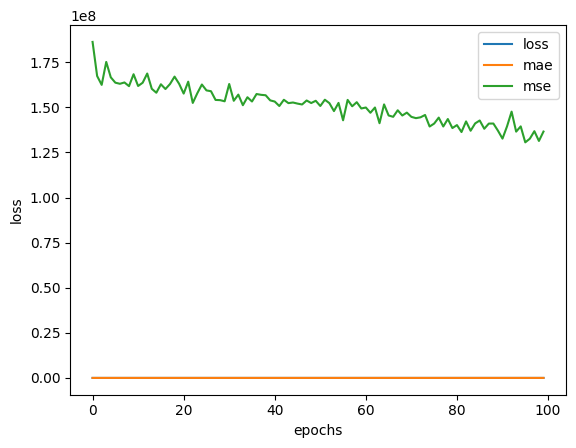

In [19]:
pd.DataFrame(history_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs');

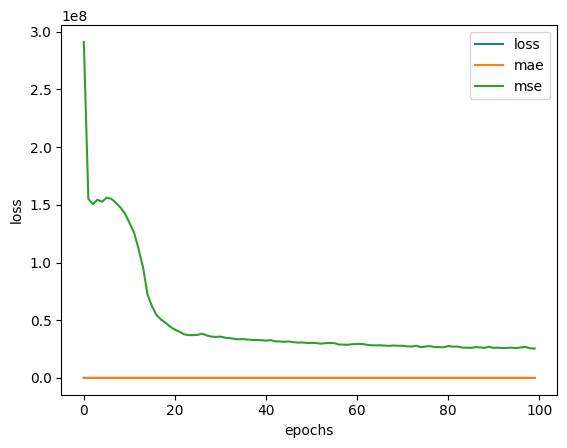

In [20]:
pd.DataFrame(history_2.history).plot() 
plt.ylabel('loss')
plt.xlabel('epochs');

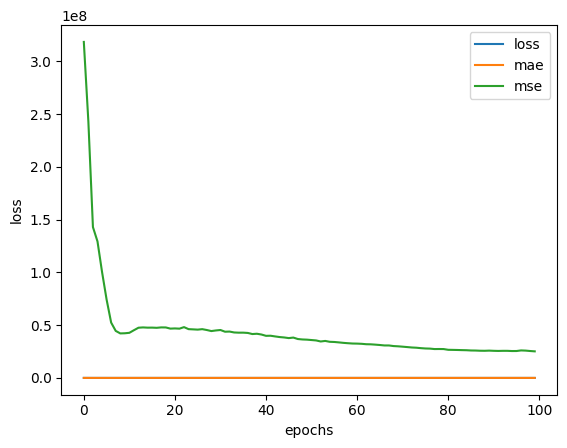

In [21]:
pd.DataFrame(history_3.history).plot() 
plt.ylabel('loss')
plt.xlabel('epochs');

In [22]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.compose import make_column_transformer

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

col_transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), 
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

col_transformer.fit(X_train) 

X_train_normal = col_transformer.transform(X_train)
X_test_normal = col_transformer.transform(X_test)

X_train_normal[:2], X_test_normal[:2]

(array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]))

In [25]:
X_train_normal.shape, X_test_normal.shape

((1070, 11), (268, 11))

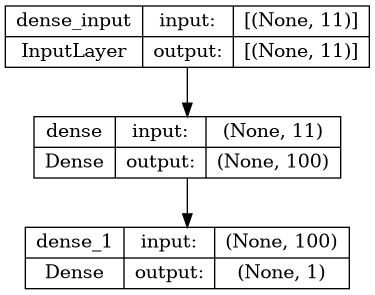

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)